
Original dataset shape: (817, 24)
Dataset shape after outlier removal: (333, 24)


<Figure size 1200x800 with 0 Axes>

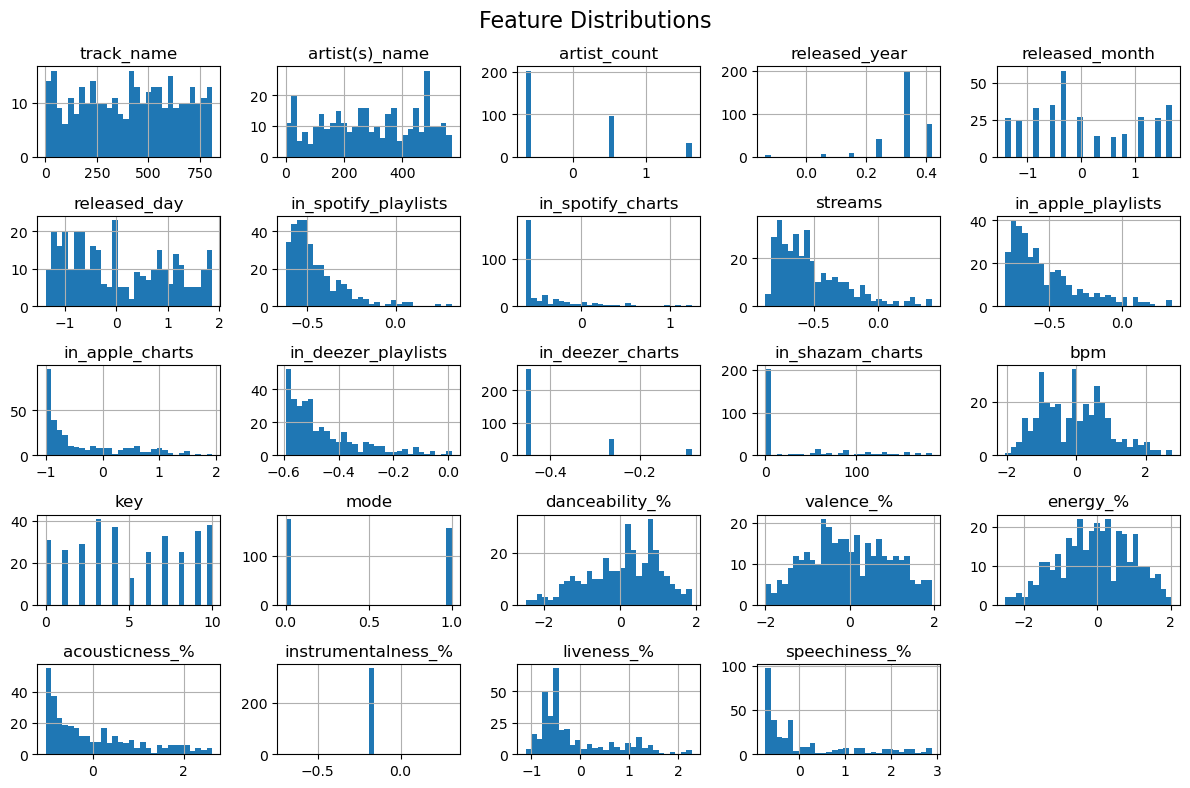

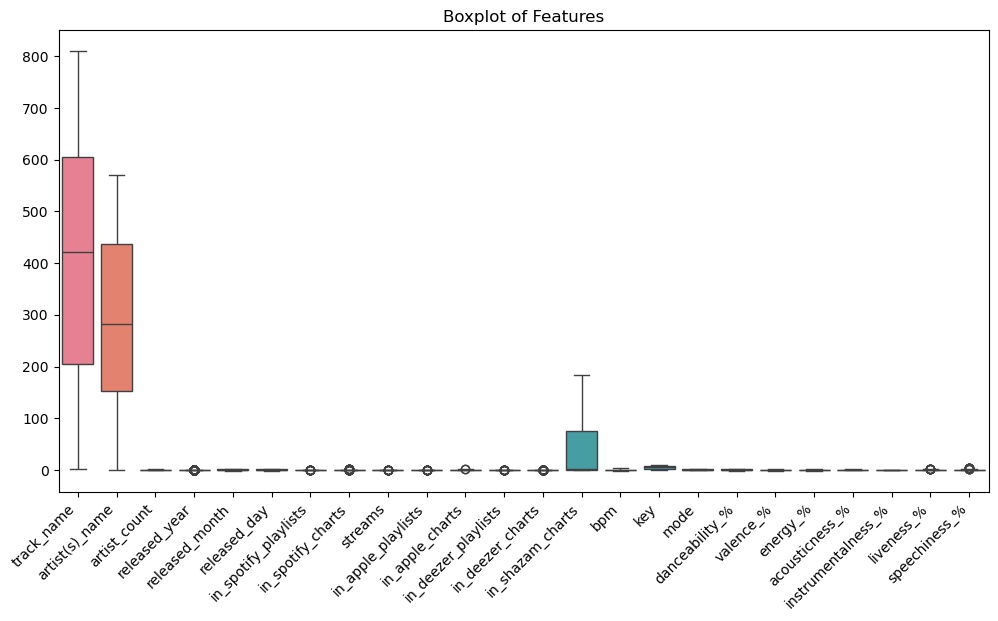

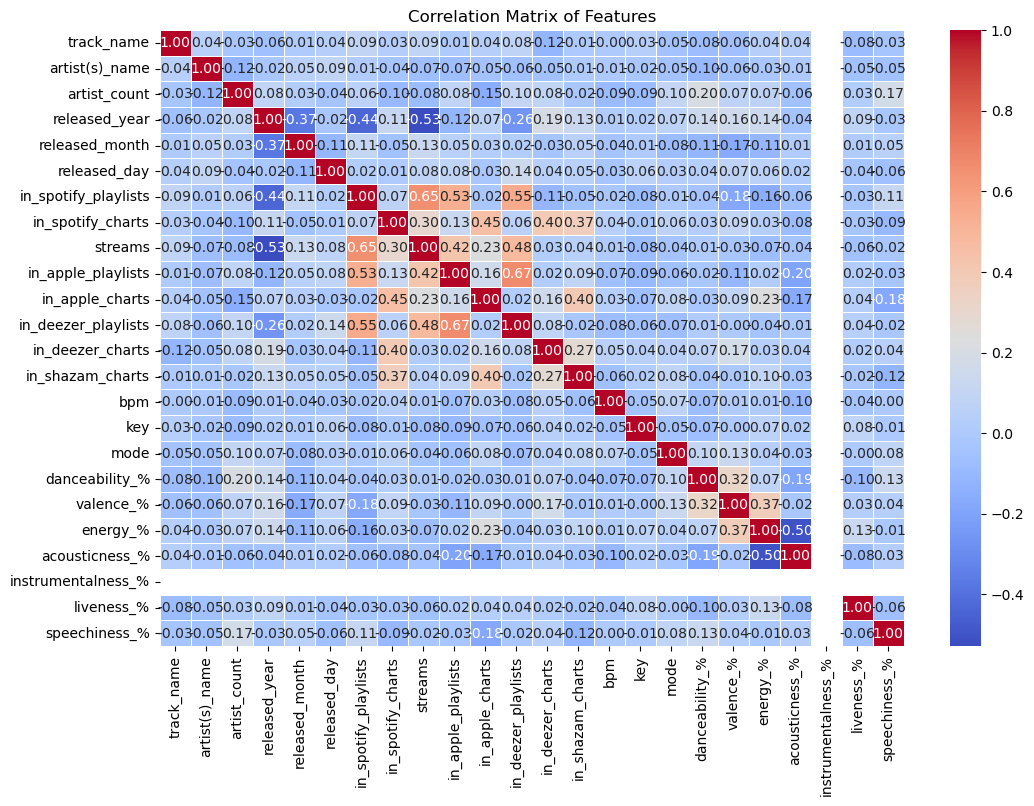

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("Spotify -Raw Data.csv", encoding='ISO-8859-1')

# missing_values = df.isnull().sum()
# print("\nMissing values per column:\n", missing_values)

# df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
# df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
# df.fillna({'streams': 0, 'in_deezer_playlists': df['in_deezer_playlists'].median()}, inplace=True)

# df_cleaned = df.dropna()

# print("\nMissing values after cleaning:\n", df_cleaned.isnull().sum())

# duplicates = df_cleaned.duplicated().sum()
# print("\nNumber of duplicate rows:", duplicates)
# df_cleaned = df_cleaned.drop_duplicates()

# print("\nDuplicates after cleaning:", df_cleaned.duplicated().sum())

# categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
# label_encoders = {}

# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

# print("\nCategorical columns after encoding:\n", df_cleaned.head())

# numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# print("\nFirst few rows after scaling numerical features:\n", df_cleaned.head())

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

df_no_outliers = remove_outliers_iqr(df_cleaned, numerical_cols)

print(f"\nOriginal dataset shape: {df_cleaned.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")

plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix of Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

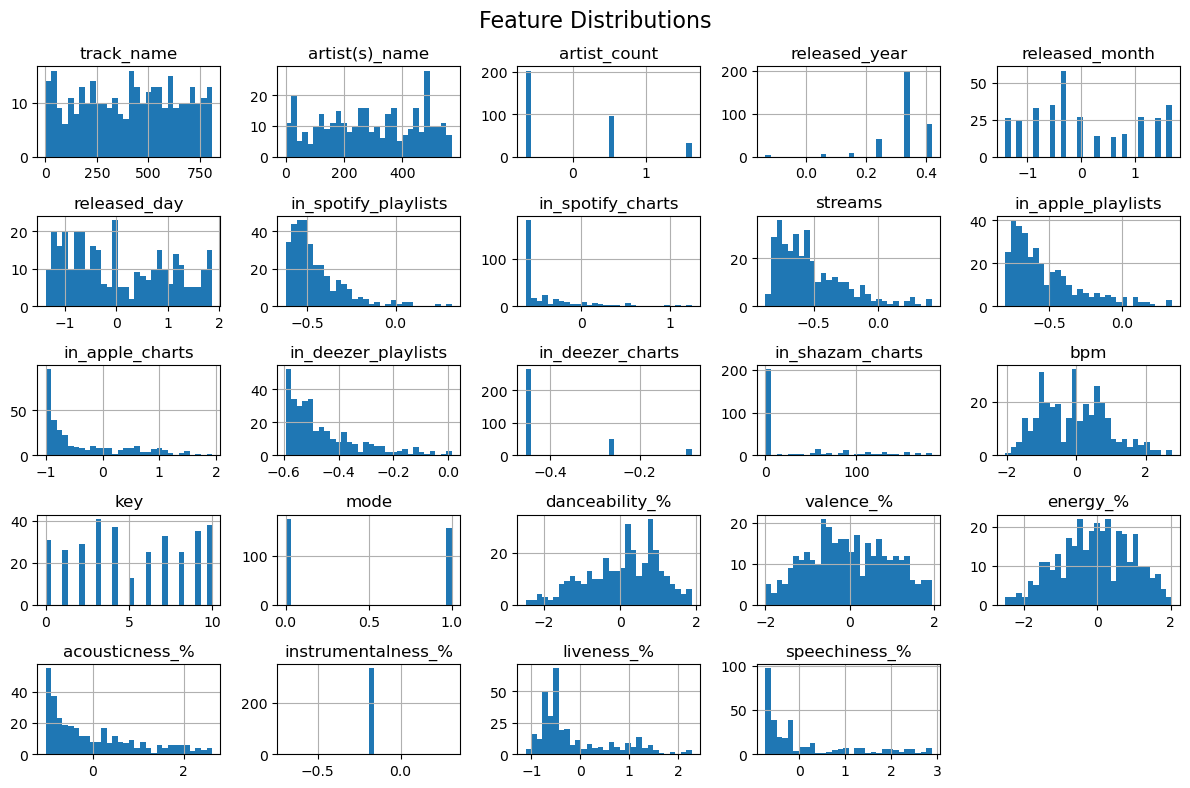

In [7]:
#to visualize cleaned data after outlier removal.
plt.figure(figsize=(12, 8))
df_no_outliers.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

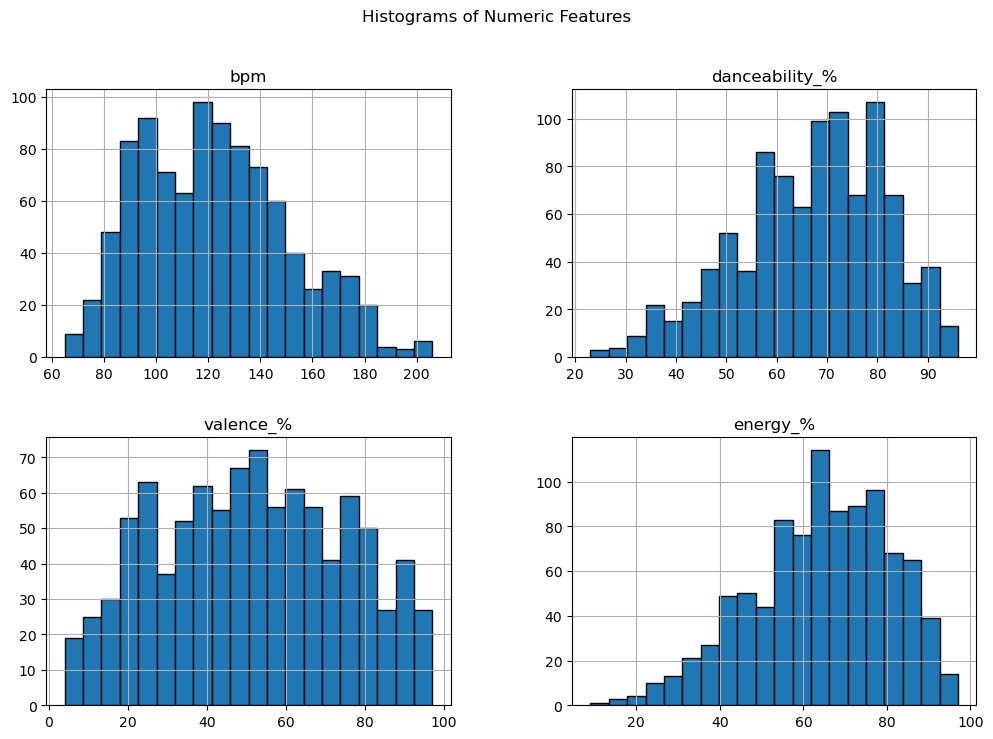

In [10]:
# Histograms for key numerical columns to analyze key features and keep outliers.
numeric_columns = ["streams", "bpm", "danceability_%", "valence_%", "energy_%"]
df[numeric_columns].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features")
plt.show()

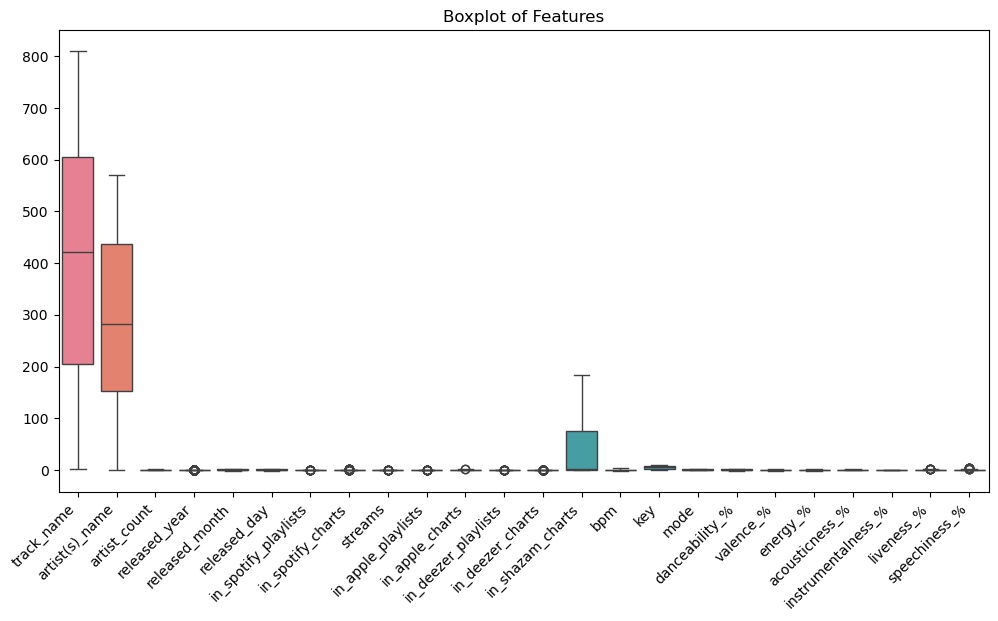

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45, ha="right")
plt.title("Boxplot of Features")
plt.show()

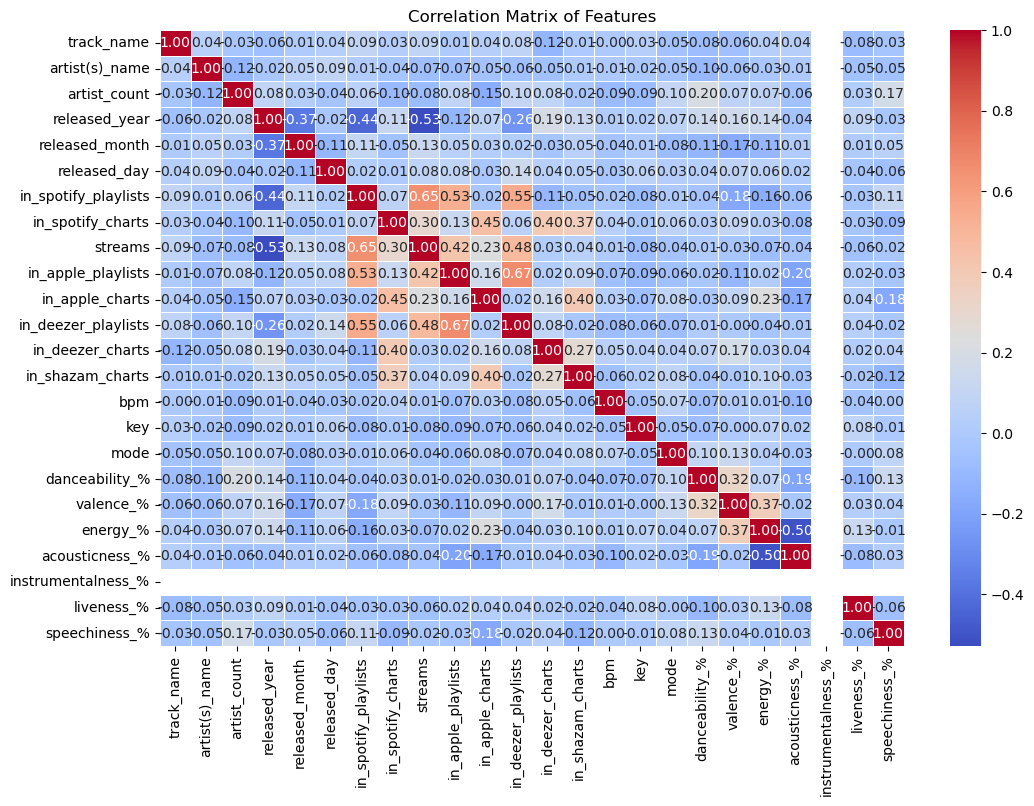

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix of Features")
plt.show()